# quant-econ Solutions: Schelling's Segregation Model

Solutions for http://quant-econ.net/jl/schelling.html

## Exercise 1

Here's one solution that does the job we want.  If you feel like a further exercise you can probably speed up some of the computations and then increase the number of agents.  


In [1]:
using Plots
pyplot()
srand(42)  # set seed for random numbers. Reproducible output

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[964434469,1073036706,1860149520,1073503458,1687169063,1073083486,-399267803,1072983952,-909620556,1072836235  …  -293054293,1073002412,-1300127419,1073642642,1917177374,-666058738,-337596527,1830741494,382,32700]),[6.93909e-310,NaN,2.14224e-314,2.14224e-314,2.14224e-314,2.14224e-314,6.93909e-310,6.93909e-310,6.93909e-310,NaN  …  4.94066e-324,2.96439e-323,0.0,6.93909e-310,6.93909e-310,6.93909e-310,4.94066e-324,6.93909e-310,0.0,0.0],382,UInt32[0x0000002a])

In [2]:
type Agent
    kind::Int
    location::Vector{Float64}
end


# constructor
Agent(k::Int) = Agent(k, rand(2))


function draw_location!(a::Agent)
    a.location = rand(2)
    nothing
end

# Define subtraction as difference between locations
-(a::Agent, o::Agent) = a.location - o.location

# distance is just 2 norm: uses our subtraction function
get_distance(a::Agent, o::Agent) = norm(a - o)


function is_happy(a::Agent, others::Vector{Agent})
    "True if sufficient number of nearest neighbors are of the same type."
    # distances is a list of pairs (d, agent), where d is distance from
    # agent to self
    distances = Any[]
    
    for agent in others
        if a != agent
            dist = get_distance(a, agent)
            push!(distances, (dist, agent))
        end
    end
    
    # == Sort from smallest to largest, according to distance == #
    sort!(distances)
    
    # == Extract the neighboring agents == #
    neighbors = [agent for (d, agent) in distances[1:num_neighbors]]
    
    # == Count how many neighbors have the same type as self == #
    num_same_type = sum([a.kind == other.kind for other in neighbors])
    
    return num_same_type >= require_same_type
end

function update!(a::Agent, others::Vector{Agent})
    "If not happy, then randomly choose new locations until happy."
    while !is_happy(a, others)
        draw_location!(a)
    end
    return nothing
end


function plot_distribution(agents::Vector{Agent}, cycle_num)
    x_vals_0, y_vals_0 = Float64[], Float64[]
    x_vals_1, y_vals_1 = Float64[], Float64[]

    # == Obtain locations of each type == #
    for agent in agents
        x, y = agent.location
        if agent.kind == 0
            push!(x_vals_0, x)
            push!(y_vals_0, y)
        else
            push!(x_vals_1, x)
            push!(y_vals_1, y)
        end
    end
    
    p = scatter(x_vals_0, y_vals_0, color=:orange, markersize=8, alpha=0.6)
    scatter!(x_vals_1, y_vals_1, color=:green, markersize=8, alpha=0.6)
    plot!(title="Cycle $(cycle_num)", legend=:none)

    return p
end;

Entering loop 1



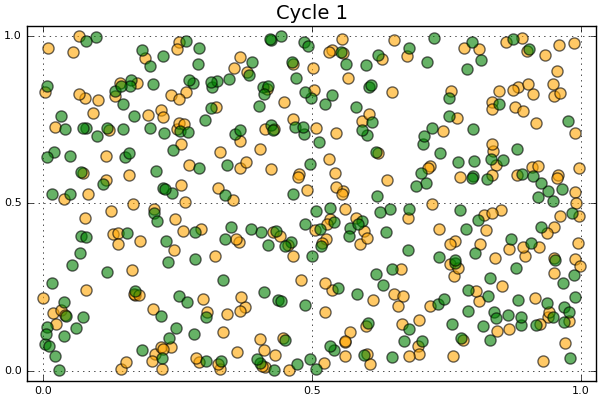

[Plots.jl] Initializing backend: pyplot
Entering loop 2



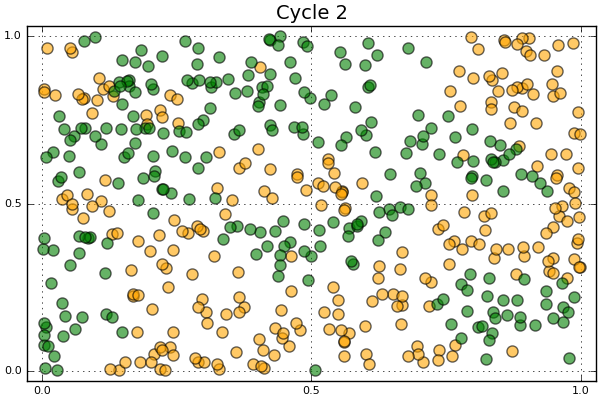

2016-08-08 13:19:23.669 julia[10919:507] setCanCycle: is deprecated.  Please use setCollectionBehavior instead



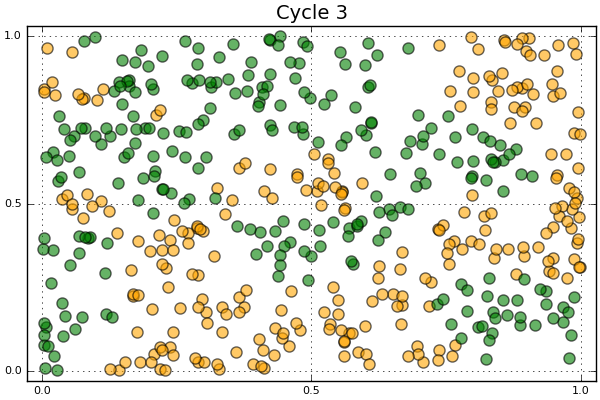

Entering loop 3



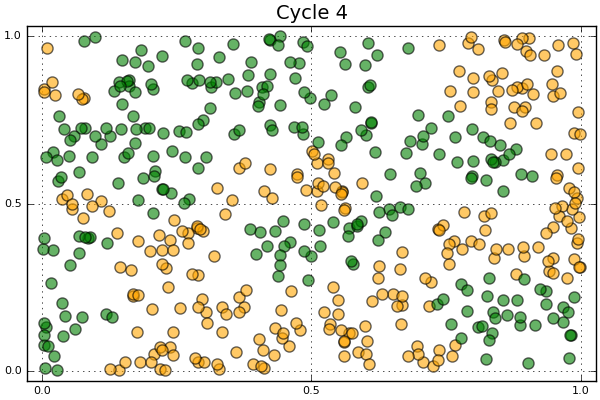

Entering loop 4
Converged, terminating


In [3]:
# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = Agent[Agent(0) for i in 1:num_of_type_0]
push!(agents, [Agent(1) for i in 1:num_of_type_1]...)

count = 1

# ==  Loop until none wishes to move == #
while true
    println("Entering loop $count")
    p = plot_distribution(agents, count)
    display(p)
    count += 1
    no_one_moved = true
    movers = 0
    for agent in agents
        old_location = agent.location
        update!(agent, agents)
        if !isapprox(0.0, maximum(old_location - agent.location))
            no_one_moved = false
        end
    end
    if no_one_moved
        break
    end
end

println("Converged, terminating")

        